# SIMULACIÓN: LABORATORIO 1
### Entrega: martes 24 de agosto 2021, 23:59 horas


__INTEGRANTES:__

   * Claudia Arias
   * Andrés Gutiérrez
   * Esteban Tejeda

### CONTENIDOS
- Ejemplo del lanzamiento de monedas
- Conceptos: Espacio muestral, evento, probabilidad
- Principios de probabilidad y propiedades



### ¿Cómo asignamos valores de probabilidad?

- $\textbf{Enfoque frecuentista relativo o de simulación:}$ Sea $n$ el número de experimentos, y $n(A)$ el número de veces que el evento $A$ ocurre en la realización de esos experimentos, entonces $P(A) = \frac{n(A)}{n}$

- $\textbf{Enfoque frecuentista clásico:}$ Sea $n(A)$ el número elementos en el evento $A$, y $n(\Omega)$ el número de elementos en el espacio muestral $\Omega$, entonces $P(A) = \frac{n(A)}{n(\Omega)}$

- $\textbf{Enfoque Bayesiano:}$ Yo pienso que la probabilidad de que me gane un proyecto es $0.9$ (probabilidad a priori).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Lanzamiento de monedas

In [2]:
# Define algunos parámetros del contexto de trabajo
sns.set_context("notebook", 
                font_scale=1.5, 
                rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')
# Crea dic variables de color que serán usadas en este contexto
rojo= sns.xkcd_rgb['vermillion']
azul= sns.xkcd_rgb['dark sky blue']


In [3]:
#utilzaremos la distribución binomial para modelar el experimento del lanzamiento de una moneda n veces
def factorial(n):
    """Calcula factorial de `n`
    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calcula la combinatoria de n y k 
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Retorna la probabilidad de que ocurran `k` caras in `n` lanzamientos de una moneda
    
    Argumentos:
    
    n - número de ensayos
    k - número de ensayos en los que se obtiene cara
    p - probabilidad de que el evento "obtener cara" ocurra
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

def lanzaMoneda(N_caras, N_exper): 
    # Calcula la probabilidad de cada posible salida (N_caras) 
    # del experimento de lanzar N_exper veces una moneda equilibrada
    probabilidades = [binom_prob(N_exper, k, 0.5) for k in range(1, N_exper + 1)]
    #p_value es la probabilidad de que la salida sea mayor o igual que N_caras
    p_value = (np.sum(probabilidades[N_caras-1:]))
    # Grafica la distribución de probabilidad calculada
    plt.step(range(1, N_exper + 1), probabilidades, where='mid', color=azul)
    plt.xlabel('número de caras')
    plt.ylabel('probabilidad')
    plt.plot((N_caras, N_caras), (0, max(probabilidades)), color=rojo)
    
    porc = round((p_value)*100,3)
    plt.annotate( str(porc) + '%', 
                 xytext=(N_caras + 10, max(probabilidades)/2), 
                 xy=(N_caras, max(probabilidades)/2), 
                 multialignment='right',
                 va='center',
                 color=rojo,
#                  size='large',
                 arrowprops={'arrowstyle': '<|-', 
                             'lw': 1, 
                             'color': rojo, 
                             'shrinkA': 1})
    plt.show()

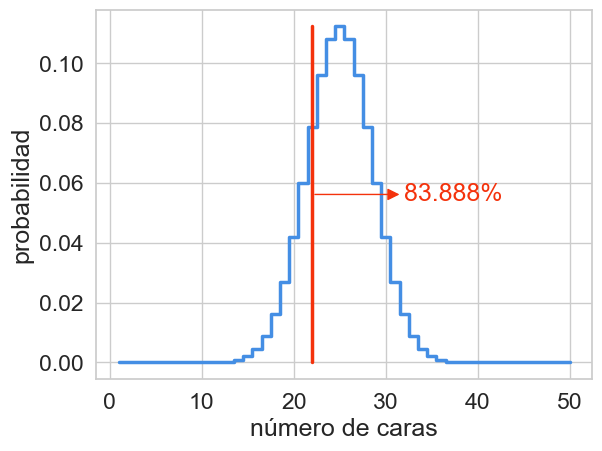

In [4]:
lanzaMoneda(22,50)

P-value simulado: 82.0%


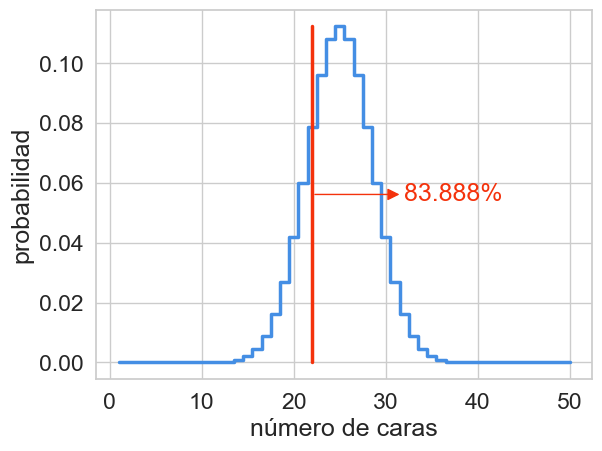

In [5]:
#Simularemos directamente el lanzamiento de la moneda considerando # valores aleatorios para el resultado de cada lanzamiento
M = 0
n = 100  # cambie este valor.
N_caras = 22
N_exper = 50
for i in range(n):
    #genera N_exper valores aleatorios 0 o 1
    ensayos = np.random.randint(2, size=N_exper)
    if (ensayos.sum() >= N_caras):
        M += 1
p = M / n

print("P-value simulado: %0.1f%%" % (p * 100))
lanzaMoneda(N_caras,N_exper)

### Pregunta 1
i) Utilice distintos valores para N_caras y N_exper ¿Qué es el valor "p" en ambos casos?

P-value simulado: 84.0%


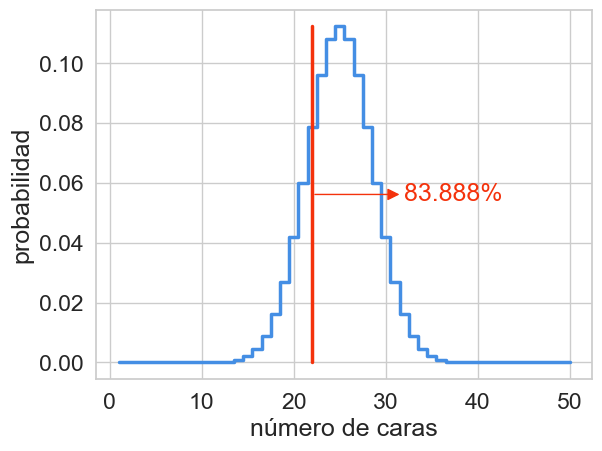

In [6]:
M = 0
n = 100000  # cambie este valor.
N_caras = 22
N_exper = 50
for i in range(n):
    #genera N_exper valores aleatorios 0 o 1
    ensayos = np.random.randint(2, size=N_exper)
    if (ensayos.sum() >= N_caras):
        M += 1
p = M / n

print("P-value simulado: %0.1f%%" % (p * 100))
lanzaMoneda(N_caras,N_exper)

__Respuesta:__ $p$ es la probabilidad simulada de tener éxitos al realizar el experimento. Entre más veces se repita (mayor sea el número $n$), más cerca estará del valor teórico.

ii) En el código de la simulación, considere valores crecientes de n ¿Desde qué cantidad la simulación reemplaza el análisis estadístico? Agregue código para graficar el comportamiento de convergencia de la simulación al valor obtenido utilizando la distribución binomial.

### Pregunta 2 
En un certamen literario hay 3 premios: ganador, finalista y mención honrosa. Cada participante sólo puede obtener un premio. Si participan 12 personas en el certamen, se puede definir, el espacio muestral de los posibles resultados como:

${S = \{ \text{todas las formas de ordenar } (1,2,3,4,5,6,7,8,9,10,11,12) \}}$

En donde los números identifican a cada una de las 12 personas y  las primeras tres ubicaciones corresponden a los escritores premiados.

Sea ${A}$ el evento en que la persona #1 es ganador, el evento ${B}$ denota que la persona #2 no gana ningún premio, y el evento ${C}$ es que la persona #3 gana la mención honrosa.

Simule las probabilidades de los siguientes eventos y compare con los valores teóricos:  

(i) $A \cup B$ 

(ii) $A \cap B$

(iii) $A \cap B \cap C$

(iv) $A \cup (B\cap C)$


puede usar random.shuffle de la biblioteca random para generar permutaciones aleatorias de [1,2,...,12] 

In [7]:
import random
L=np.arange(1,13,1)

A= [1,[0]]
B= [2,[3,4,5,6,7,8,9,10,11]]
C= [3,[2]]

#per=permutacion(11,11)
#print(per)

#A=(1/12) es la probabilidad que L[0]=1
#B=(9/12) es la probabilidad que L[3]=2 v  L[4]=2 v  L[5]=2
#                              v L[6]=2 v  L[7]=2 v  L[8]=2
#                              v L[9]=2 v L[10]=2 v L[11]=2
#C=(1/12) es la probabilidad que L[2]=3

In [8]:
def permutacion(n,r): #r permutación sobre un n conjunto
    p=(factorial(n))/(factorial(n-r))
    return p

def sorteo(L,n): #L conjunto, n número de veces que se realiza el sorteo
    X = 0
    Y = 0
    Z = 0
    #o_1 = 0
    perm=permutacion(12,12)
    
    for i in range(n):
        random.shuffle(L)
        if (L[0]==1):
            X+=1
            if (L[1]==2):
                o_1+=1
        if (L[1]>=4):
            Y+=1
        if (L[2]==3):
            Z+=1
    
    print(X)
    print(Y)
    print(Z)
    print(perm)
    #print(o_1)
    
def comprueba(n, p):
    for i in p:
        if n == L[i]:
            return True
    return False

def prueba(v, e, u):
    c=0;
    for i in range(v):
        random.shuffle(L)
        ar = np.array([False for x in range(e.shape[0])])
        
        for i, [n, p] in enumerate(e):
            ar[i]=comprueba(n, p)
          
        if(u):
            if ar.any():c+=1
        else:
            if ar.all(): c+=1
          
    prob = c/v    
    return prob
            
     
def prueba2(v, e, t):
    c=0;
    for i in range(v):
        random.shuffle(L)
        ar = np.array([False for x in range(e.shape[0])])
        met = np.array([False for x in range(t.__len__())])
        
        for i, [n, p] in enumerate(e):
            ar[i]=comprueba(n, p)   
            
        for i, _or in enumerate(t):            
            cache=[]
            for _and in _or:
                cache.append(ar[_and])
            met[i]= all(cache)
            
        if any(met):
            c+=1
          
    prob = c/v   
    return prob

In [9]:
#per=permutacion(11,11)
#print(per)

1. Valor teórico:

    P(𝐴∪𝐵) = P(A) + P(B) - P(A∩B)

    P(𝐴∪𝐵) = (1/12) + (9/12) - (1/12)*(9/11)

    P(𝐴∪𝐵) = 83.33%

In [10]:
a = np.array([A,B], dtype=object)
cont=0

for i in range(1000):
    cont+= prueba(100, a, u=True)
    prob = cont/1000

print("P(𝐴∪𝐵) = " + str(prob*100) + "%")

P(𝐴∪𝐵) = 76.51999999999978%


2. Valor teórico:

   P(𝐴∩𝐵) = P(A)*P(A|B)
   
   P(𝐴∩𝐵) = (1/12)*(9/11)
   
   P(𝐴∩𝐵) = 6.81%

In [11]:
b = np.array([A,B], dtype=object)
cont=0

for i in range(1000):
    cont+= prueba(100, b, u=False)
    prob = cont/1000

print("P(𝐴∩𝐵) = "+ str(prob*100) + "%")

P(𝐴∩𝐵) = 6.864000000000002%


3. Valor teórico:
    P(𝐴∩𝐵∩𝐶) = P(𝐴∩𝐵)*P((𝐴∩𝐵)|𝐶)
    
    P(𝐴∩𝐵∩𝐶) = (0.0681)*((1/10)
    
    P(𝐴∩𝐵∩𝐶) = 0.681%

In [12]:
c = np.array([A,B,C], dtype=object)
cont=0
for i in range(1000):
    cont+= prueba(100 , c, u=False)
    prob = cont/1000
print("P(𝐴∩𝐵∩𝐶) = "+ str(prob*100) + "%")

P(𝐴∩𝐵∩𝐶) = 0.7329999999999918%


4. Valor teórico:

P(𝐵∩𝐶) = P(B)*P(C|B)

P(𝐵∩𝐶) = (9/12)*(1/11)

P(𝐵∩𝐶) = 6.81%

Entonces:

P(𝐴∪(𝐵∩𝐶)) = P(A) + P(𝐵∩𝐶) - P(A∩(𝐵∩𝐶)) = P(A) + P(𝐵∩𝐶) - P(A)*P((𝐵∩𝐶)|A)

P(𝐴∪(𝐵∩𝐶)) = (1/12) + (0.0681) - ((1/12)*(9/11)*(1/10))

P(𝐴∪(𝐵∩𝐶)) = 14.46%

In [13]:
d = np.array([A,B,C], dtype=object)
cont=0
for i in range(1000):
    cont+= prueba2(100 , d, [[0],[1,2]])
    prob = cont/1000
print("P(𝐴∪(𝐵∩𝐶)) = "+ str(prob*100) + "%")

P(𝐴∪(𝐵∩𝐶)) = 14.574999999999994%


In [14]:
#sorteo(L,100)

### Pregunta 3

__i) Demuestre _b_ y _c_ en la propiedad de Independencia.__



__(b)__ $A$ es independiente de $B^c$ 

* Demostración:

    $A = \Omega \cap A = (B \dot{\cup}B^c) \cap A = (B \cap A)\dot{\cup}(B^c \cap A)$

    Entonces:
    
    $P(A)=P(B \cap A)+P(B^c \cap A) = P(B)P(A)+ P(B^c \cap A)$
    
    De esta manera:
    
    $P(B^c \cap A)= (1-P(B))P(A)= P(B^c)P(A)$

__(c)__ $A^c$ es independiente de $B^c$ 

* Demostración:

    $A^c \cap B^c = \Omega - A \cup B$ 
    
    Entonces:
    
    $P(A^c \cap B^c) = 1 - P(A \cup B$) 
    
    Luego:
    
    $P(A^c \cap B^c) = 1 - [P(A)+P(B)-P(A \cap B)]=1 - [P(A)+P(B)-P(A)P(B)]$
    
    $P(A^c \cap B^c) = 1 - P(A)-P(B)+P(A)P(B)= [1-P(A)]-P(B)[1-P(A)]$
    
    $P(A^c \cap B^c) = [1-P(A)][1-P(B)]= P(A^c)P(B^c)$

__ii) Demuestre el Teorema de las Probabiliades totales.__


* Teorema de las Probabilidades Totales:

    $P(A) = \sum_{i=1}^n P(A | B_i)P(B_i)$

* Demostración:

    $A=(A \cap B_1) \cup (A \cap B_2) \cup (A \cap B_3) \cup ... \cup (A \cap B_n)$

    $P(A)=P(A \cap B_1) + P(A \cap B_2) + P|(A \cap B_3) \cup ... \cup P(A \cap B_n)$

    Por propiedades de conjunto se tiene:

    $P(A)= P(A | B_1)P(B_1)+P(A | B_2)P(B_2)+P(A | B_3)P(B_3)+...+P(A | B_n)P(B_n) = \sum_{i=1}^n P(A | B_i)P(B_i)$

# Referencias
1. https://github.com/croach/statistics-for-hackers/blob/master/statistics-for-hackers.ipynb
2. Ross, S. M. (2006). Simulation. Elsevier.